In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**IMPORT** **LABRARY**




In [2]:

#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats
import os
import torch
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from yellowbrick.classifier import ROCAUC

# Classifier Libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Feature extraction
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix, precision_score,recall_score
from scipy.special import boxcox, inv_boxcox
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.model_selection import KFold
#import modeling algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Feature extraction
from sklearn.naive_bayes import GaussianNB




In [ ]:
# import dataset
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit card fraud detection/creditcard.csv')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 284807 rows and 31 columns


In [ ]:
# show data in the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# data type visualization and converstion
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Checking for null values!
df.isnull().sum().max()

0

In [ ]:
# Define the column
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
pd.value_counts('Class')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Class    5
dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

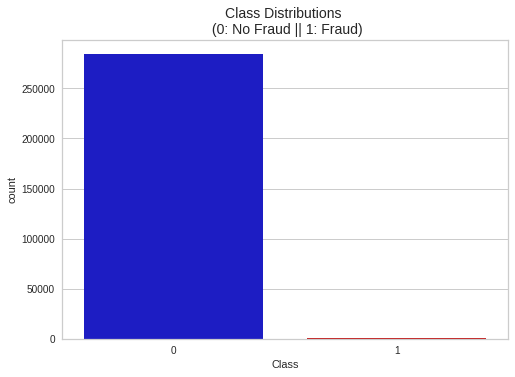

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

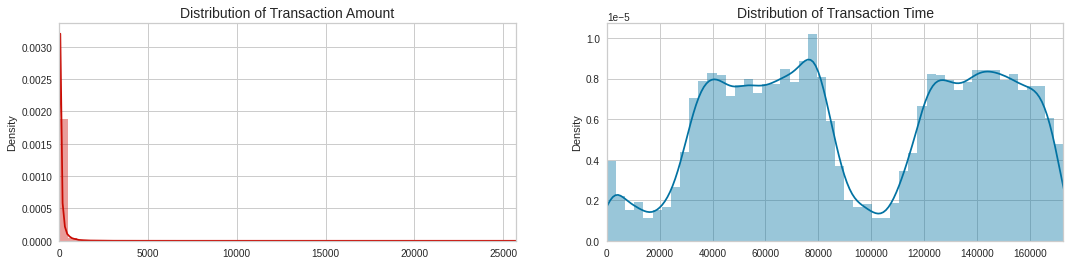

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
# Creating target and predictor matrix
X = df.drop('Class', axis=1)
y = df['Class']
X.head(10)


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
5,-0.256131,-0.994960,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080
6,-0.237686,-0.994937,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168
7,0.262698,-0.994901,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339
8,0.994900,-0.994901,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404
9,-0.255991,-0.994878,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076


In [ ]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =20)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
lda.fit(X=X_train,y=y_train)
lda.predict(X_train)
lda.predict(X_test)
lda.score(X=X_train,y=y_train)
lda.score(X=X_test,y=y_test)

reduced_data = lda.fit(X,y).transform(X)
principalDf = pd.DataFrame(data = reduced_data, columns = ['PC-1'])
# Adding lables
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

In [ ]:
lda.explained_variance_ratio_

array([1.])

In [ ]:
# data splitting
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=None,shuffle=True)
for train_index,test_index in kf.split(reduced_data):
    print("Train",train_index,"validation:",test_index)
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]

Train [     0      2      3 ... 284804 284805 284806] validation: [     1      4     10 ... 284790 284792 284794]
Train [     0      1      2 ... 284803 284804 284805] validation: [     9     12     15 ... 284788 284802 284806]
Train [     0      1      2 ... 284804 284805 284806] validation: [     3      8     19 ... 284799 284800 284801]
Train [     0      1      3 ... 284804 284805 284806] validation: [     2      5      6 ... 284793 284798 284803]
Train [     1      2      3 ... 284802 284803 284806] validation: [     0     13     20 ... 284797 284804 284805]


In [ ]:
#deep learning algorithm multiplies the weights and input data of the nodes and it takes lots of time, So for reducing that time we scale the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#resampling with smotetomek
smt=SMOTETomek(random_state=0)
X_smt,y_smt =smt.fit_resample(X_train,y_train)
pd.value_counts(y_smt)

0    227448
1    227448
Name: Class, dtype: int64

In [ ]:
#creating the ANN model
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
##creating model
classifier = Sequential()

In [ ]:
# Adding the input layer and first Hidden Layer
classifier.add(Dense(activation = "relu", input_dim = 30, units = 6, kernel_initializer='uniform' ))

# Adding the Second hidden layer
classifier.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

# Adding the third hidden layer
classifier.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Addinng the output Layer
classifier.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [ ]:
#taking summary of layers
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 186       
                                                                 
 dense_1 (Dense)             (None, 20)                140       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
 #fitting the ANN to the training set
model = classifier.fit(X_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
2279/2279 [==============================] - 4s 1ms/step - loss: 0.0348 - accuracy: 0.9979
Epoch 2/10
2279/2279 [==============================] - 3s 1ms/step - loss: 0.0042 - accuracy: 0.9983
Epoch 3/10
2279/2279 [==============================] - 3s 1ms/step - loss: 0.0037 - accuracy: 0.9987
Epoch 4/10
2279/2279 [==============================] - 3s 1ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/10
2279/2279 [==============================] - 3s 1ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 6/10
2279/2279 [==============================] - 3s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 7/10
2279/2279 [==============================] - 3s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 8/10
2279/2279 [==============================] - 3s 1ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 9/10
2279/2279 [==============================] - 3s 1ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 10/10
2279/2279 [==============================] - 3s 1ms/step - loss: 0.002

In [ ]:
#now testing for Test data
y_predict = classifier.predict(X_test)
y_predict

1781/1781 [==============================] - 1s 754us/step


array([[6.1103742e-04],
       [3.6556978e-04],
       [7.7920129e-05],
       ...,
       [1.1344974e-05],
       [2.1151689e-06],
       [1.2365610e-06]], dtype=float32)

In [ ]:
#converting values
y_pred = (y_predict>0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_Frudlent', 'is_not Frudlent'],
                         columns=['predicted_frudlent','predicted_not frudlent'])
confusion

,predicted_frudlent,predicted_not frudlent
is_Frudlent,76,18
is_not Frudlent,8,56859


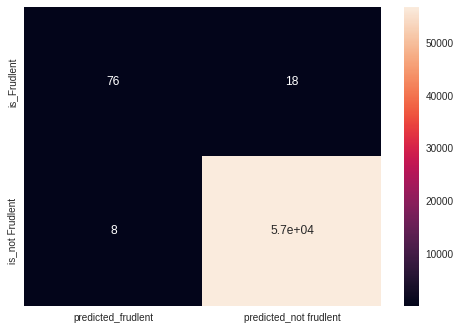

In [ ]:
sns.heatmap(confusion, annot=True)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('accuracy %s' %metrics.accuracy_score(y_pred,y_test))
target_names = [' Not Fruad [Class 0]', 'Fruad[Class 1]']
print(classification_report(y_test, y_pred,target_names=target_names))

accuracy 0.9995435473394076
                      precision    recall  f1-score   support

 Not Fruad [Class 0]       1.00      1.00      1.00     56867
      Fruad[Class 1]       0.90      0.81      0.85        94

            accuracy                           1.00     56961
           macro avg       0.95      0.90      0.93     56961
        weighted avg       1.00      1.00      1.00     56961



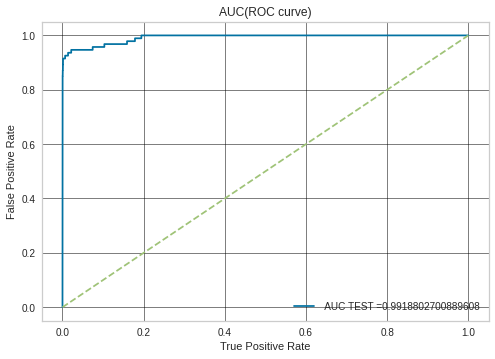

In [ ]:
#plot AUCROC curve
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_predict)

plt.grid()
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()